Treinando MLP para função A: f(x) = sin(2x) + cos(3x)
Treinando MLP para função B: f(x) = 10x^5 + 5x^4 + 2x^3 - 0.5x^2 + 3x + 2

Função A - MSE Treinamento: 0.002110, MSE Teste: 0.001560
Função B - MSE Treinamento: 228201.837188, MSE Teste: 296204.524228


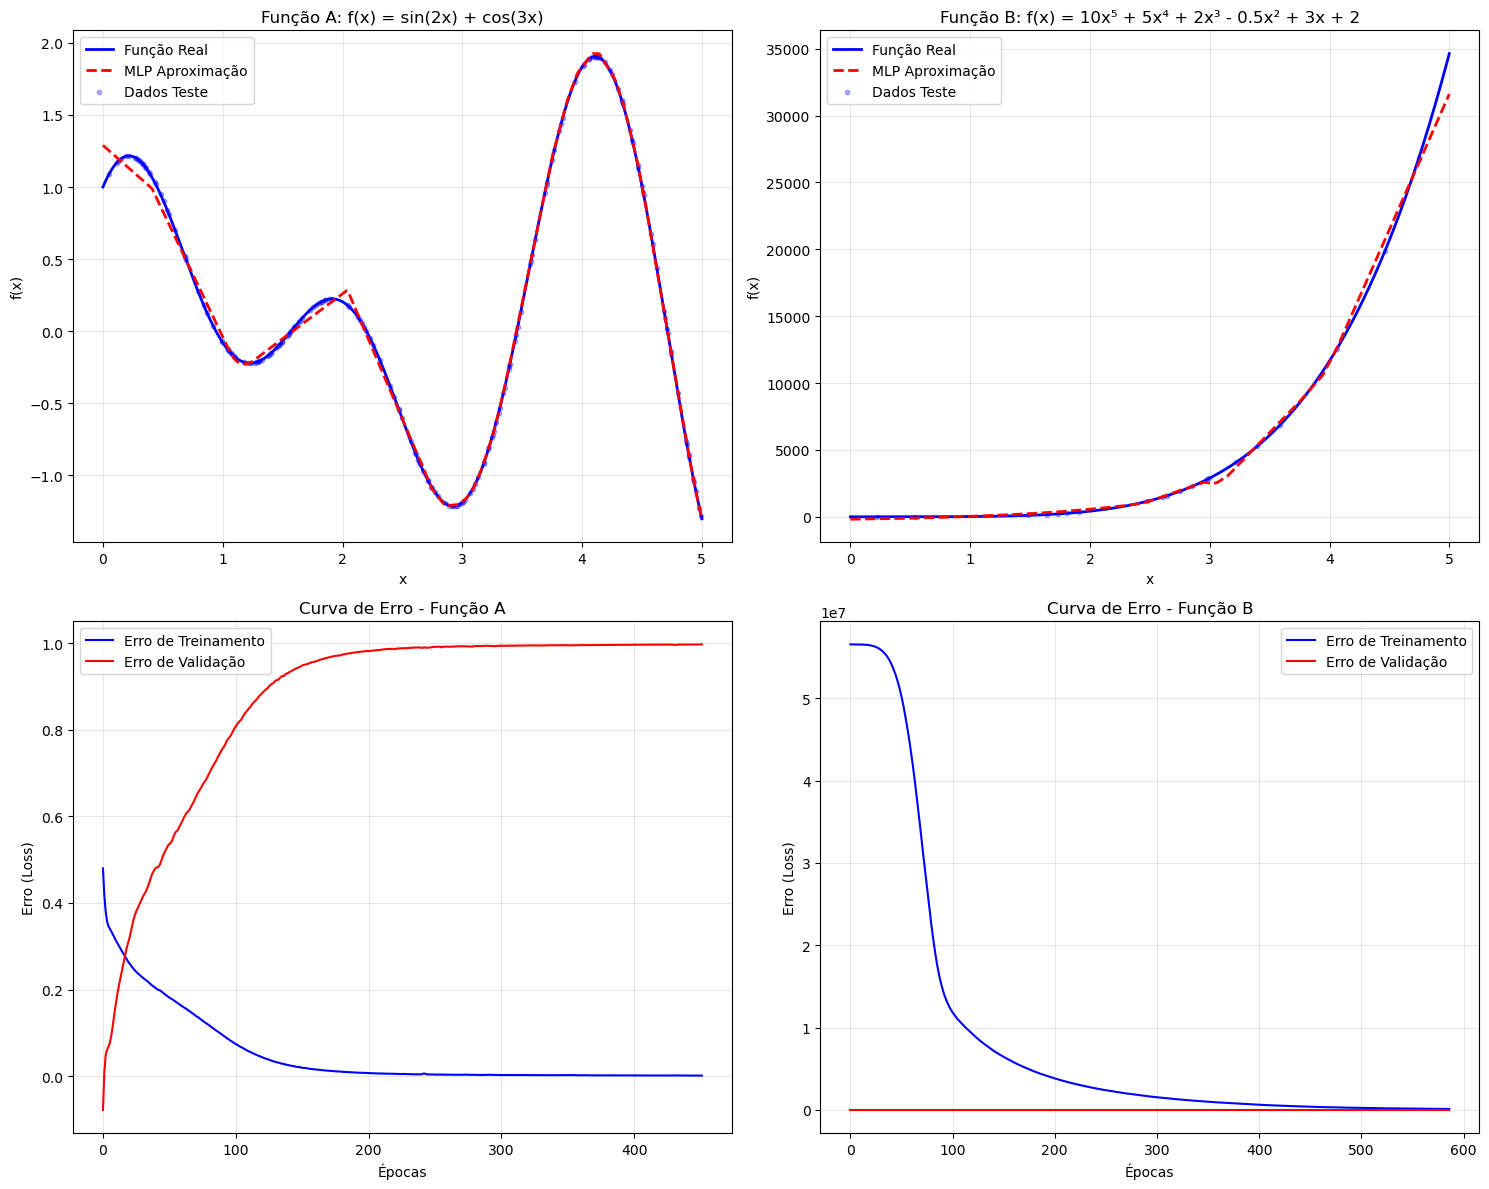


ANÁLISE DETALHADA DOS RESULTADOS

FUNÇÃO A: f(x) = sin(2x) + cos(3x)
Arquitetura da rede: (50, 30)
Número de iterações: 452
MSE Treinamento: 0.002110
MSE Teste: 0.001560
RMSE Teste: 0.039500

FUNÇÃO B: f(x) = 10x⁵ + 5x⁴ + 2x³ - 0.5x² + 3x + 2
Arquitetura da rede: (100, 50, 30)
Número de iterações: 587
MSE Treinamento: 228201.837188
MSE Teste: 296204.524228
RMSE Teste: 544.246749


In [2]:
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import warnings

import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

# Definir as funções
def func_a(x):
    """f(x) = sin(2x) + cos(3x)"""
    return np.sin(2*x) + np.cos(3*x)

def func_b(x):
    """f(x) = 10x^5 + 5x^4 + 2x^3 - 0.5x^2 + 3x + 2"""
    return 10*x**5 + 5*x**4 + 2*x**3 - 0.5*x**2 + 3*x + 2

# Gerar dados para ambas as funções
x_range = np.linspace(0, 5, 1000)

# Função A
y_a = func_a(x_range)
X_a = x_range.reshape(-1, 1)
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X_a, y_a, test_size=0.2, random_state=42)

# Função B
y_b = func_b(x_range)
X_b = x_range.reshape(-1, 1)
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_b, y_b, test_size=0.2, random_state=42)

# Normalizar os dados
scaler_a = StandardScaler()
X_train_a_scaled = scaler_a.fit_transform(X_train_a)
X_test_a_scaled = scaler_a.transform(X_test_a)

scaler_b = StandardScaler()
X_train_b_scaled = scaler_b.fit_transform(X_train_b)
X_test_b_scaled = scaler_b.transform(X_test_b)

# Criar e treinar os MLPs
print("Treinando MLP para função A: f(x) = sin(2x) + cos(3x)")
mlp_a = MLPRegressor(hidden_layer_sizes=(50, 30), max_iter=2000, random_state=42, 
                     early_stopping=True, validation_fraction=0.2, n_iter_no_change=50)
mlp_a.fit(X_train_a_scaled, y_train_a)

print("Treinando MLP para função B: f(x) = 10x^5 + 5x^4 + 2x^3 - 0.5x^2 + 3x + 2")
mlp_b = MLPRegressor(hidden_layer_sizes=(100, 50, 30), max_iter=2000, random_state=42,
                     early_stopping=True, validation_fraction=0.2, n_iter_no_change=50)
mlp_b.fit(X_train_b_scaled, y_train_b)

# Fazer predições
y_pred_train_a = mlp_a.predict(X_train_a_scaled)
y_pred_test_a = mlp_a.predict(X_test_a_scaled)

y_pred_train_b = mlp_b.predict(X_train_b_scaled)
y_pred_test_b = mlp_b.predict(X_test_b_scaled)

# Calcular erros
mse_train_a = mean_squared_error(y_train_a, y_pred_train_a)
mse_test_a = mean_squared_error(y_test_a, y_pred_test_a)

mse_train_b = mean_squared_error(y_train_b, y_pred_train_b)
mse_test_b = mean_squared_error(y_test_b, y_pred_test_b)

print(f"\nFunção A - MSE Treinamento: {mse_train_a:.6f}, MSE Teste: {mse_test_a:.6f}")
print(f"Função B - MSE Treinamento: {mse_train_b:.6f}, MSE Teste: {mse_test_b:.6f}")

# Plotar resultados
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Função A - Aproximação
x_plot = np.linspace(0, 5, 500).reshape(-1, 1)
x_plot_scaled_a = scaler_a.transform(x_plot)
y_pred_plot_a = mlp_a.predict(x_plot_scaled_a)

axes[0, 0].plot(x_plot, func_a(x_plot.flatten()), 'b-', label='Função Real', linewidth=2)
axes[0, 0].plot(x_plot, y_pred_plot_a, 'r--', label='MLP Aproximação', linewidth=2)
axes[0, 0].scatter(X_test_a, y_test_a, alpha=0.3, s=10, color='blue', label='Dados Teste')
axes[0, 0].set_title('Função A: f(x) = sin(2x) + cos(3x)')
axes[0, 0].set_xlabel('x')
axes[0, 0].set_ylabel('f(x)')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Função B - Aproximação
x_plot_scaled_b = scaler_b.transform(x_plot)
y_pred_plot_b = mlp_b.predict(x_plot_scaled_b)

axes[0, 1].plot(x_plot, func_b(x_plot.flatten()), 'b-', label='Função Real', linewidth=2)
axes[0, 1].plot(x_plot, y_pred_plot_b, 'r--', label='MLP Aproximação', linewidth=2)
axes[0, 1].scatter(X_test_b[::10], y_test_b[::10], alpha=0.3, s=10, color='blue', label='Dados Teste')
axes[0, 1].set_title('Função B: f(x) = 10x⁵ + 5x⁴ + 2x³ - 0.5x² + 3x + 2')
axes[0, 1].set_xlabel('x')
axes[0, 1].set_ylabel('f(x)')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Curvas de erro - Função A
axes[1, 0].plot(mlp_a.loss_curve_, 'b-', label='Erro de Treinamento')
if hasattr(mlp_a, 'validation_scores_'):
    axes[1, 0].plot(mlp_a.validation_scores_, 'r-', label='Erro de Validação')
axes[1, 0].set_title('Curva de Erro - Função A')
axes[1, 0].set_xlabel('Épocas')
axes[1, 0].set_ylabel('Erro (Loss)')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Curvas de erro - Função B
axes[1, 1].plot(mlp_b.loss_curve_, 'b-', label='Erro de Treinamento')
if hasattr(mlp_b, 'validation_scores_'):
    axes[1, 1].plot(mlp_b.validation_scores_, 'r-', label='Erro de Validação')
axes[1, 1].set_title('Curva de Erro - Função B')
axes[1, 1].set_xlabel('Épocas')
axes[1, 1].set_ylabel('Erro (Loss)')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Análise detalhada dos erros
print("\n" + "="*50)
print("ANÁLISE DETALHADA DOS RESULTADOS")
print("="*50)

print(f"\nFUNÇÃO A: f(x) = sin(2x) + cos(3x)")
print(f"Arquitetura da rede: {mlp_a.hidden_layer_sizes}")
print(f"Número de iterações: {mlp_a.n_iter_}")
print(f"MSE Treinamento: {mse_train_a:.6f}")
print(f"MSE Teste: {mse_test_a:.6f}")
print(f"RMSE Teste: {np.sqrt(mse_test_a):.6f}")

print(f"\nFUNÇÃO B: f(x) = 10x⁵ + 5x⁴ + 2x³ - 0.5x² + 3x + 2")
print(f"Arquitetura da rede: {mlp_b.hidden_layer_sizes}")
print(f"Número de iterações: {mlp_b.n_iter_}")
print(f"MSE Treinamento: {mse_train_b:.6f}")
print(f"MSE Teste: {mse_test_b:.6f}")
print(f"RMSE Teste: {np.sqrt(mse_test_b):.6f}")